In [174]:
import pandas as pd
import numpy as np
import os 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.graph_objs as go
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [99]:
os.getcwd()

'/Users/anujjain/Desktop/Side_Project/AH_EDA'

In [100]:
df = pd.read_csv('AH_Provisional_COVID-19_Deaths_by_Hospital_Referral_Region.csv')
gdf = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

<h2>Data Summary</h2>

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138618 entries, 0 to 138617
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Data as of                      138618 non-null  object 
 1   Start Date                      138618 non-null  object 
 2   End Date                        138618 non-null  object 
 3   MMWR Year                       138618 non-null  int64  
 4   MMWR Week                       138618 non-null  int64  
 5   Week Ending Date                138618 non-null  object 
 6   HRR Name                        138618 non-null  object 
 7   HRR Number                      138618 non-null  int64  
 8   State                           138618 non-null  object 
 9   Total Deaths                    133928 non-null  float64
 10  COVID-19 Deaths                 97029 non-null   float64
 11  Total Deaths over 65 years      125650 non-null  float64
 12  COVID-19 Deaths 

In [102]:
df.describe()

,MMWR Year,MMWR Week,HRR Number,Total Deaths,COVID-19 Deaths,Total Deaths over 65 years,COVID-19 Deaths over 65 years,Total Deaths 65 to 74 years,COVID-19 Deaths 65 to 74 years,Total Deaths 75 to 84 years,COVID-19 Deaths 75 to 84 years,Total Deaths over 85 years,COVID-19 Deaths over 85 years,Accuracy_index
count,138618.000000,138618.000000,138618.000000,133928.000000,97029.000000,125650.000000,94990.000000,65396.000000,97561.000000,74074.000000,94988.000000,82247.000000,94521.000000,138618.000000
mean,2018.860927,25.922737,248.647059,94.816836,4.843432,72.912543,3.387760,32.094501,0.693750,35.579094,0.803434,42.463143,0.829148,0.856332
std,2.511017,14.890700,124.080538,146.478860,28.086417,107.444981,20.724709,35.752445,6.533904,40.714292,7.101443,51.514877,7.027669,0.171386
min,2015.000000,1.000000,1.000000,10.000682,0.000000,10.000063,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.076077
25%,2017.000000,13.000000,149.000000,25.096167,0.000000,20.598816,0.000000,13.878089,0.000000,14.856635,0.000000,15.428892,0.000000,0.826470
50%,2019.000000,26.000000,253.500000,48.147746,0.000000,38.656639,0.000000,19.054392,0.000000,21.511821,0.000000,25.205868,0.000000,0.907707
75%,2021.000000,38.000000,352.000000,98.380715,0.000000,75.782059,0.000000,35.081831,0.000000,37.820995,0.000000,47.660707,0.000000,0.948277
max,2023.000000,53.000000,457.000000,3802.804311,1981.071760,2752.402820,1392.978872,808.112746,475.870680,896.458681,496.736921,1047.831394,457.904187,1.999868


In [103]:
df = df.drop('Footnote',axis =1)

<h3>We will use these fields to Fill the Null Value:</h3>
<h5>'MMWR Year','State','HRR Name','HRR Number'</h5>

The rationale for utilizing the aforementioned features stems from the distinct death counts associated with each state, with fatalities potentially influenced by a multitude of parameters. Consequently, the decision to group the data based on state and year is deemed logical. Moreover, opting against the exclusion of rows is imperative due to the substantial magnitude of the death count.

In [104]:
null_value_dic = {}
for i in df.columns[df.isnull().any()]:
    null_value_dic[i] = df[i].isnull().sum()

In [105]:
null_value_dic

{'Total Deaths': 4690,
 'COVID-19 Deaths': 41589,
 'Total Deaths over 65 years': 12968,
 'COVID-19 Deaths over 65 years': 43628,
 'Total Deaths 65 to 74 years': 73222,
 'COVID-19 Deaths 65 to 74 years': 41057,
 'Total Deaths 75 to 84 years': 64544,
 'COVID-19 Deaths 75 to 84 years': 43630,
 'Total Deaths over 85 years': 56371,
 'COVID-19 Deaths over 85 years': 44097}

In [106]:
def handling_null_values(i): 
    print('###################################################################')
    # Check NaN values before transformation
    print(i + ": NaN values before transformation:", df[df[i].isna()].shape[0])
    
    # The following line will update the value to its mean based on the group-by condition.
    df[i] = df[i].fillna(df.groupby(['MMWR Year', 'State', 'HRR Name', 'HRR Number'])[i].transform('mean'))
    
    # If no result is found based on the above condition, the value will be updated to 0.
    df[i] = df[i].replace(np.nan,0, regex=True)


    # Check NaN values after transformation
    print(i+ ": NaN values after transformation:", df[i].isna().sum())
    print('###################################################################')

In [107]:
for key, value in null_value_dic.items():
    handling_null_values(key)

###################################################################
Total Deaths: NaN values before transformation: 4690
Total Deaths: NaN values after transformation: 0
###################################################################
###################################################################
COVID-19 Deaths: NaN values before transformation: 41589
COVID-19 Deaths: NaN values after transformation: 0
###################################################################
###################################################################
Total Deaths over 65 years: NaN values before transformation: 12968
Total Deaths over 65 years: NaN values after transformation: 0
###################################################################
###################################################################
COVID-19 Deaths over 65 years: NaN values before transformation: 43628
COVID-19 Deaths over 65 years: NaN values after transformation: 0
#############################################

<h4>Check if any remaining Nan or null value is present</h4>

In [108]:
df.isnull().any()

Data as of                        False
Start Date                        False
End Date                          False
MMWR Year                         False
MMWR Week                         False
Week Ending Date                  False
HRR Name                          False
HRR Number                        False
State                             False
Total Deaths                      False
COVID-19 Deaths                   False
Total Deaths over 65 years        False
COVID-19 Deaths over 65 years     False
Total Deaths 65 to 74 years       False
COVID-19 Deaths 65 to 74 years    False
Total Deaths 75 to 84 years       False
COVID-19 Deaths 75 to 84 years    False
Total Deaths over 85 years        False
COVID-19 Deaths over 85 years     False
Accuracy_index                    False
dtype: bool

In [109]:
df.dtypes

Data as of                         object
Start Date                         object
End Date                           object
MMWR Year                           int64
MMWR Week                           int64
Week Ending Date                   object
HRR Name                           object
HRR Number                          int64
State                              object
Total Deaths                      float64
COVID-19 Deaths                   float64
Total Deaths over 65 years        float64
COVID-19 Deaths over 65 years     float64
Total Deaths 65 to 74 years       float64
COVID-19 Deaths 65 to 74 years    float64
Total Deaths 75 to 84 years       float64
COVID-19 Deaths 75 to 84 years    float64
Total Deaths over 85 years        float64
COVID-19 Deaths over 85 years     float64
Accuracy_index                    float64
dtype: object

<h4>Yearly Death Analysis</h4>

In [110]:
df_yearly_tl = pd.DataFrame(df.groupby('MMWR Year')['Total Deaths'].sum().astype('int64'))
df_yearly_tl = df_yearly_tl.reset_index()

df_grouped = df.groupby(['MMWR Year'],as_index = False)[['Total Deaths over 65 years','Total Deaths 65 to 74 years',
                                                                               'Total Deaths 75 to 84 years','Total Deaths over 85 years',
                                                                               'COVID-19 Deaths','COVID-19 Deaths over 65 years','COVID-19 Deaths 65 to 74 years',
                                                                               'COVID-19 Deaths 75 to 84 years','COVID-19 Deaths over 85 years']].sum()

In [111]:
df_yearly_tl, df_grouped

(   MMWR Year  Total Deaths
 0       2015       1311899
 1       2016       1329712
 2       2017       1364561
 3       2018       1377420
 4       2019       1381960
 5       2020       1698804
 6       2021       1677353
 7       2022       1582449
 8       2023       1020164,
    MMWR Year  Total Deaths over 65 years  Total Deaths 65 to 74 years  \
 0       2015                9.560547e+05                226256.994560   
 1       2016                9.627520e+05                231535.971243   
 2       2017                9.948024e+05                244903.835109   
 3       2018                1.008702e+06                252201.751310   
 4       2019                1.015261e+06                253988.921048   
 5       2020                1.246405e+06                344744.038638   
 6       2021                1.192734e+06                349219.164250   
 7       2022                1.159130e+06                318053.226870   
 8       2023                7.501335e+05            

Text(0.5, 1.0, 'Yearly Total deaths')

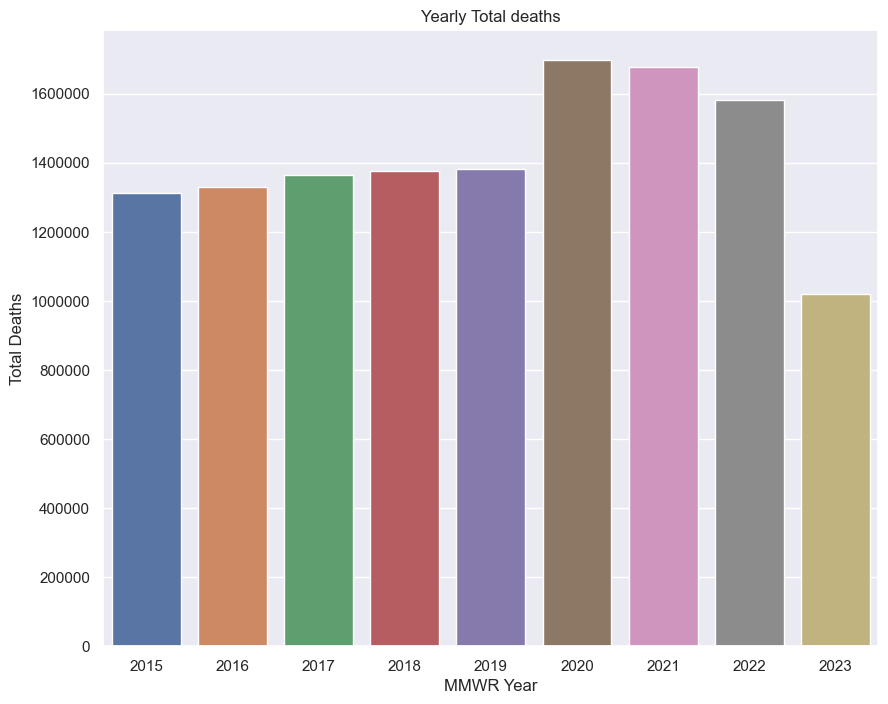

In [112]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='MMWR Year', y='Total Deaths', data=df_yearly_tl)
plt.ticklabel_format(style='plain', axis='y') # to convert the value from scintific to numeric 
plt.title('Yearly Total deaths')

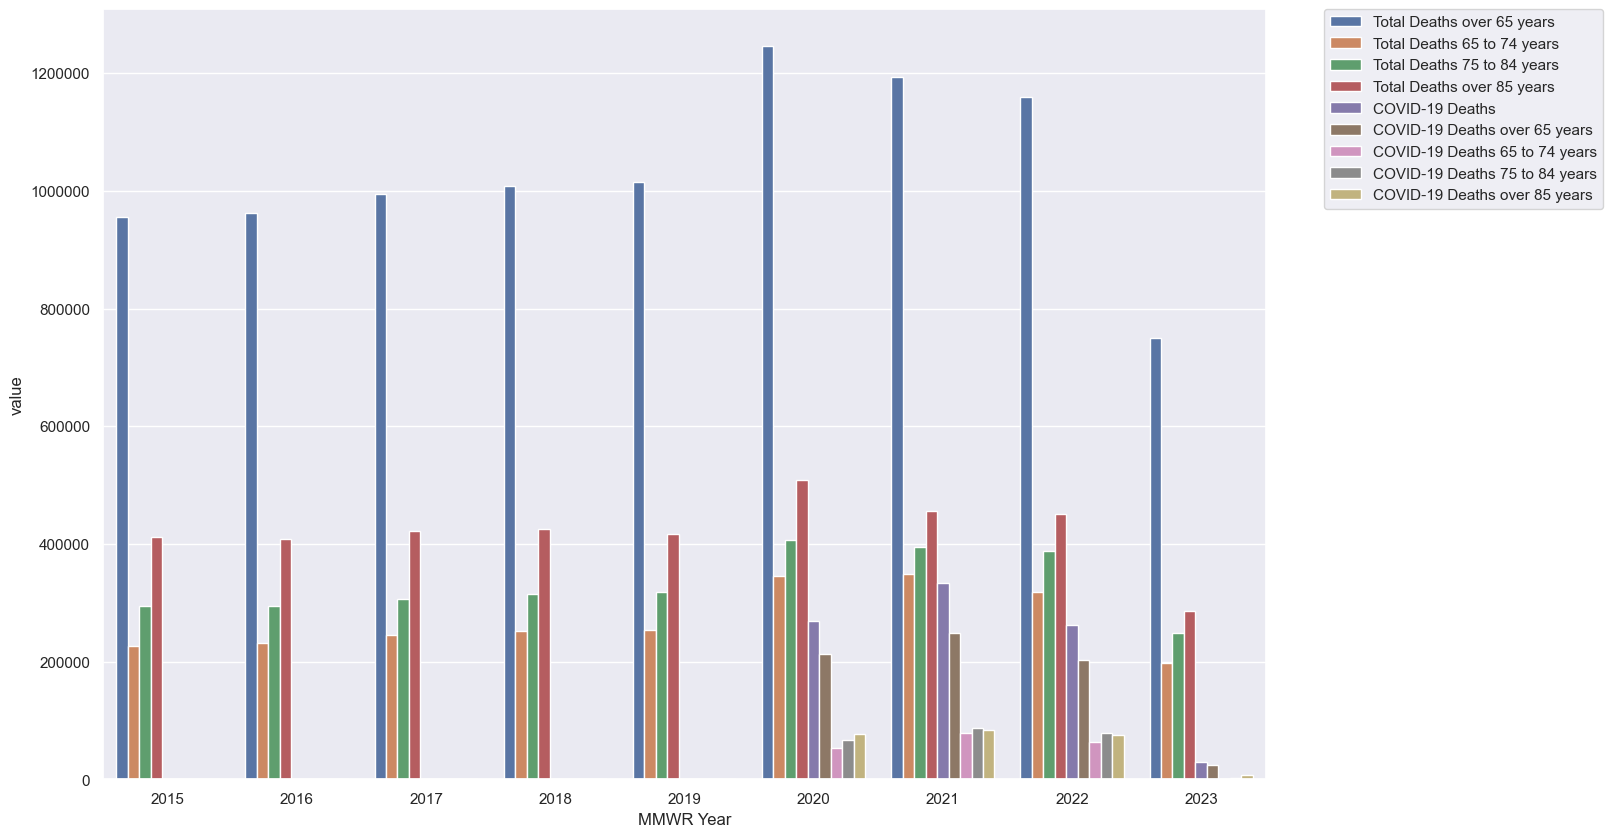

In [113]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='MMWR Year', y='value', hue='variable', data=pd.melt(df_grouped, id_vars=['MMWR Year'], 
                                                                   value_vars=['Total Deaths over 65 years','Total Deaths 65 to 74 years',
                                                                               'Total Deaths 75 to 84 years','Total Deaths over 85 years',
                                                                               'COVID-19 Deaths','COVID-19 Deaths over 65 years','COVID-19 Deaths 65 to 74 years',
                                                                               'COVID-19 Deaths 75 to 84 years','COVID-19 Deaths over 85 years']))
plt.ticklabel_format(style='plain', axis='y') # to convert the value from scintific to numeric 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



<h4>Death Index by States (USA)</h4>

In [114]:
df_state_ttl = df.groupby(['State'],as_index = False)['Total Deaths'].sum()
df_state_cvd = df.groupby(['State'],as_index = False)['COVID-19 Deaths'].sum()
# Merge the shapefile with your DataFrame based on the 'State' column
Merged_ttl = gdf.merge(df_state_ttl, left_on='STUSPS', right_on='State', how='left')
Merged_cvd = gdf.merge(df_state_cvd, left_on='STUSPS', right_on='State', how='left')

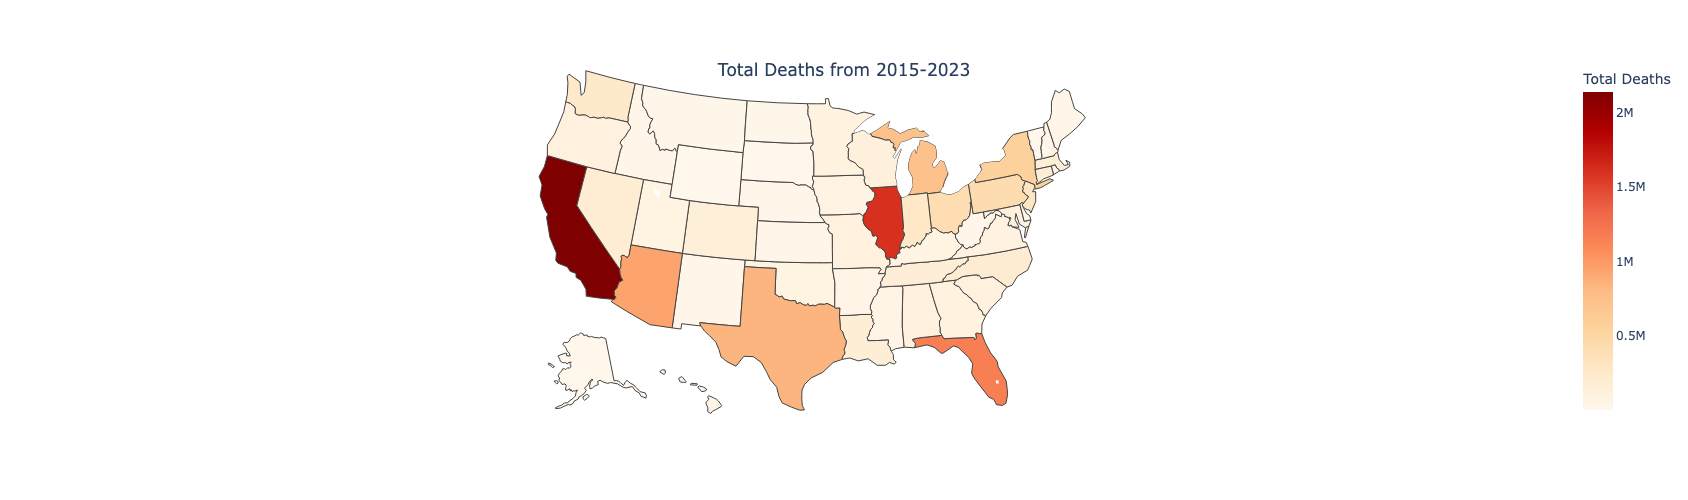

In [115]:
fig = px.choropleth(Merged_ttl, 
                    locations='STUSPS', 
                    locationmode='USA-states',
                    color='Total Deaths',
                    scope="usa",
                    color_continuous_scale="OrRd",
                    labels={'Total Deaths': 'Total Deaths'}
                   )


fig.update_layout(
    title=dict(
        text="Total Deaths from 2015-2023",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='top',
        y=.99,
        pad={'b': 0}
    ),
    
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
    ),
    height=500,
    width=750
)

fig.show()


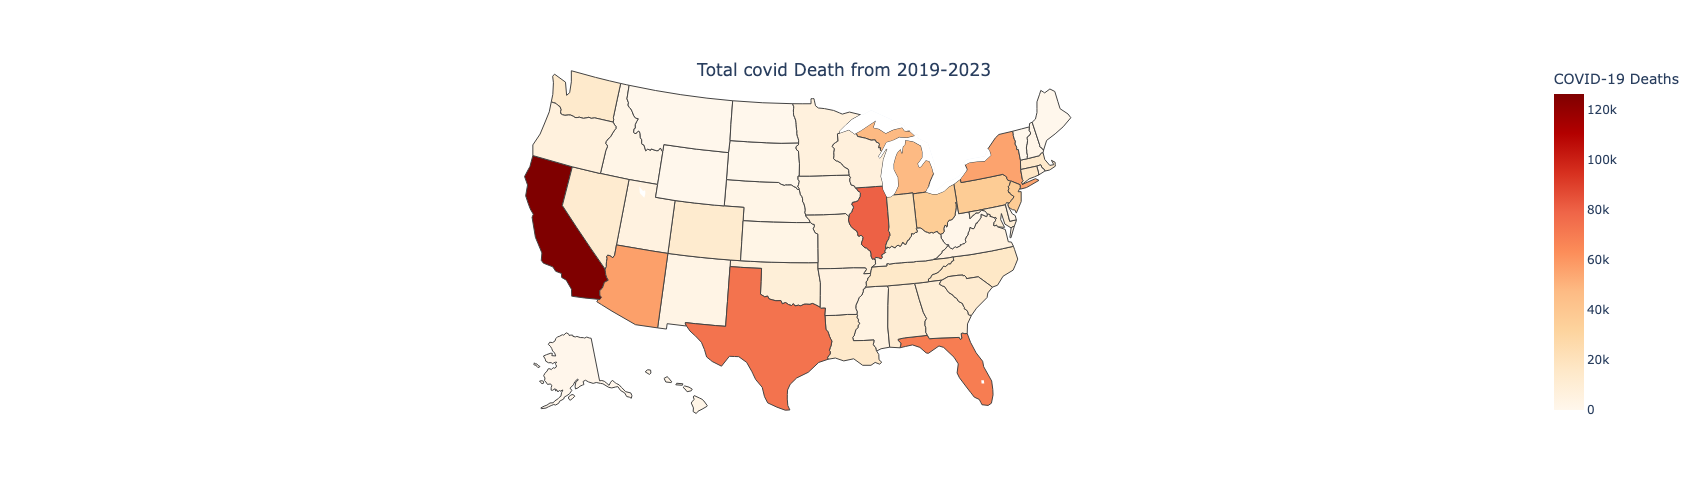

In [116]:
fig = px.choropleth(Merged_cvd, 
                    locations='STUSPS', 
                    locationmode='USA-states',
                    color='COVID-19 Deaths',
                    scope="usa",
                    color_continuous_scale="OrRd",
                    labels={'COVID-19 Deaths': 'COVID-19 Deaths'}
                   )


fig.update_layout(
    title=dict(
        text="Total covid Death from 2019-2023",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='top',
        y=.99,
        pad={'b': 0}
    ),
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
    ),
    height=500,
    width=750
)

fig.show()

In [117]:
df_state_city_cvd = df.groupby(['State','HRR Name'],as_index = False)['COVID-19 Deaths'].sum()

In [118]:
df_state_city_cvd

,State,HRR Name,COVID-19 Deaths
0,AK,AK- ANCHORAGE,571.377521
1,AL,AL- BIRMINGHAM,2877.699993
2,AL,AL- DOTHAN,582.908236
3,AL,AL- HUNTSVILLE,2201.858473
4,AL,AL- MOBILE,2723.339732
...,...,...,...
301,WI,WI- WAUSAU,747.752421
302,WV,WV- CHARLESTON,533.562148
303,WV,WV- HUNTINGTON,0.000000
304,WV,WV- MORGANTOWN,539.042732


In [119]:
df_state_city_cvd = df_state_city_cvd.merge(df_state_cvd , on='State', how='left')

In [120]:
df_state_city_cvd['Status'] = np.where(df_state_city_cvd.groupby('State')['COVID-19 Deaths_x'].transform('sum') > 50000, 'High', 'Low')
df_state_city_cvd[['State', 'City']] = df_state_city_cvd['HRR Name'].str.extract('(\w{2})-\s(.+)')



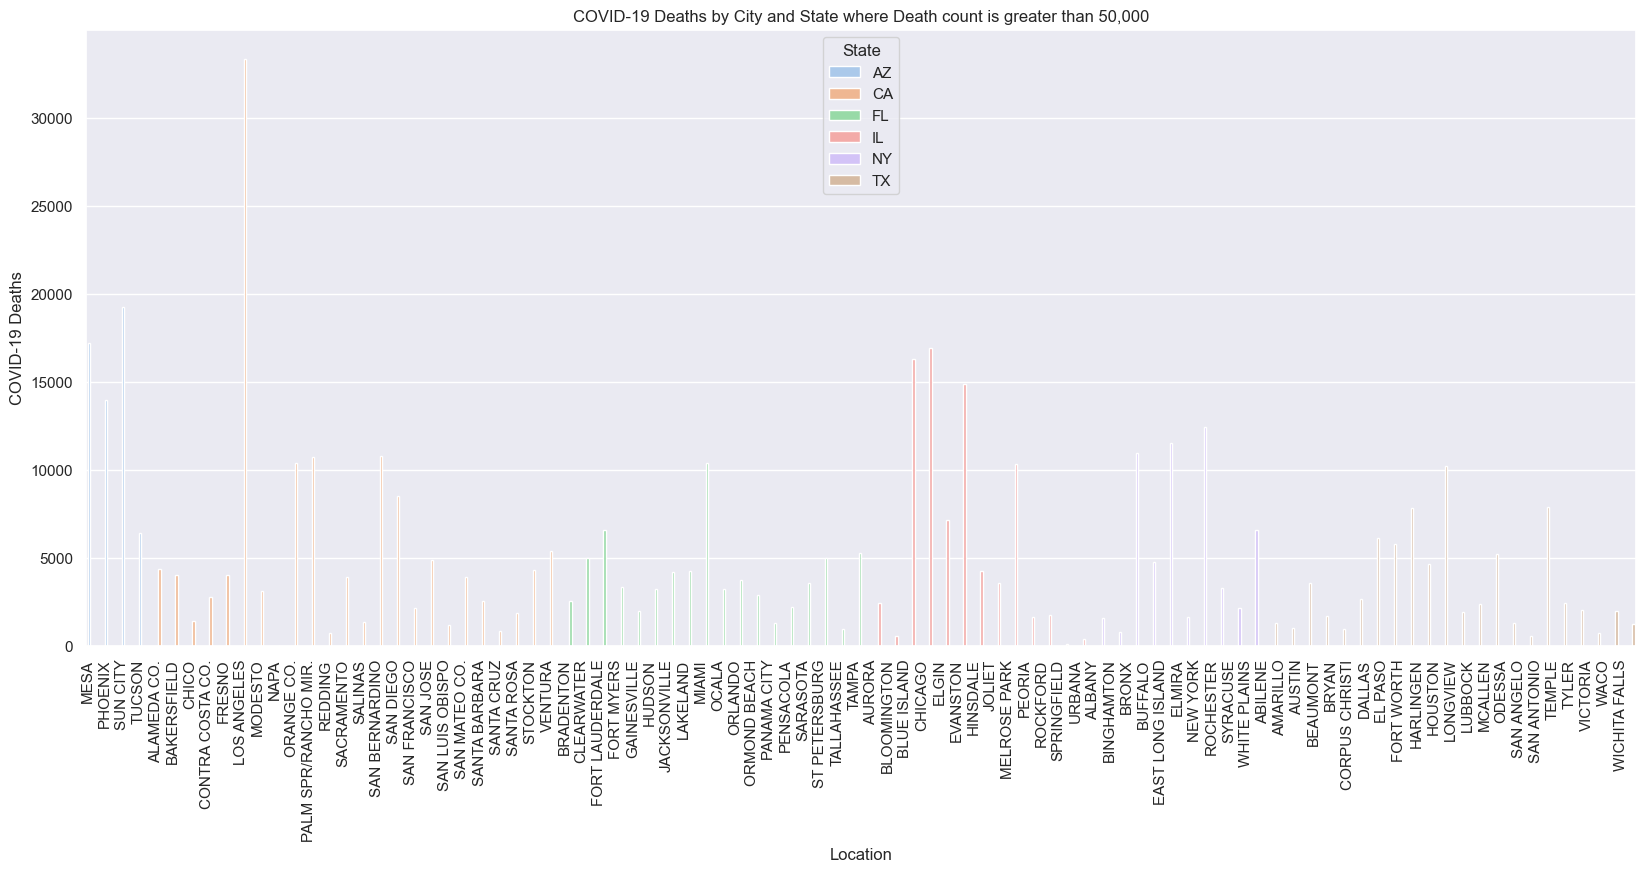

In [122]:
# Assuming 'COVID-19 Deaths_x' is the variable you want to plot
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='City', y='COVID-19 Deaths_x', hue='State', data=df_state_city_cvd[df_state_city_cvd['Status'] =='High'], ax=ax, palette='pastel')

# Adding labels and title
ax.set_xlabel('Location')
ax.set_ylabel('COVID-19 Deaths')
ax.set_title('COVID-19 Deaths by City and State where Death count is greater than 50,000')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

plt.show()


/var/folders/cl/3k_bw7s10q13rg_3fflzd9_00000gn/T/ipykernel_17065/2665932435.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

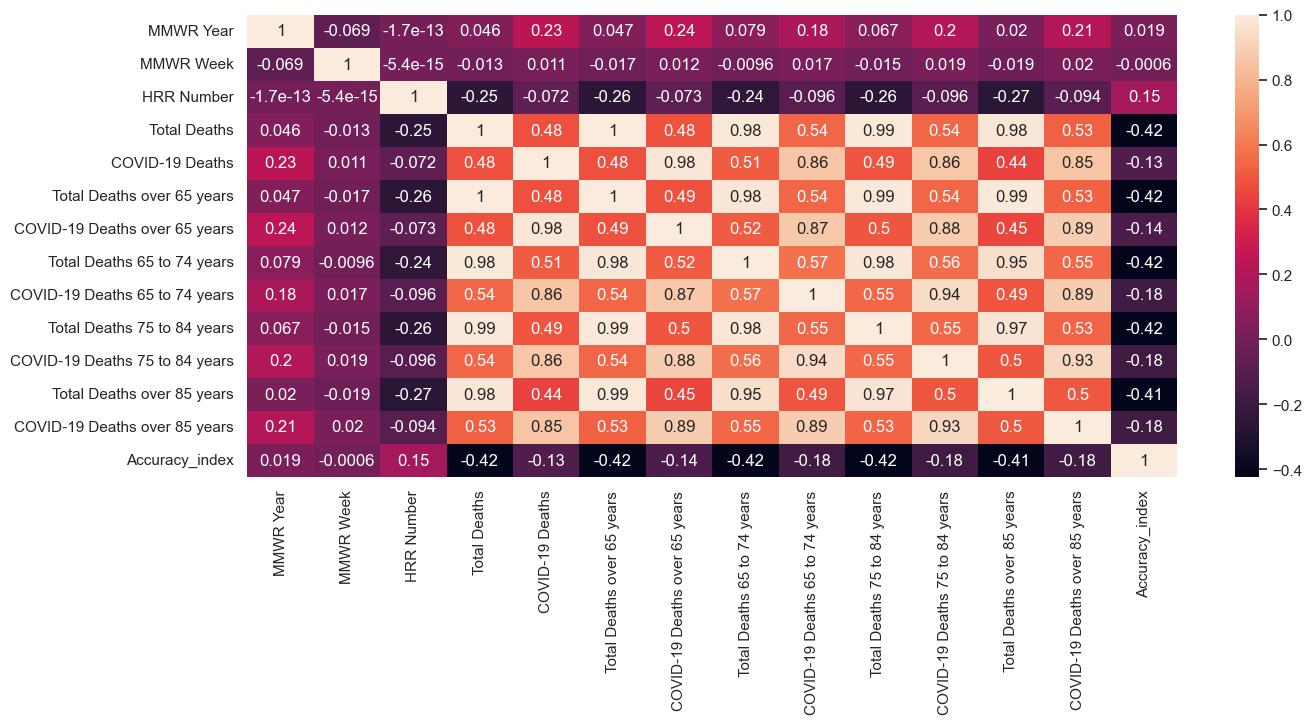

In [171]:
corr = df.corr()
plt.figure(figsize= (15,6))
sns.heatmap(corr, annot=True)


<h3> Feature Selection with Random Forest</h3>

In [175]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [181]:
features=x.columns
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

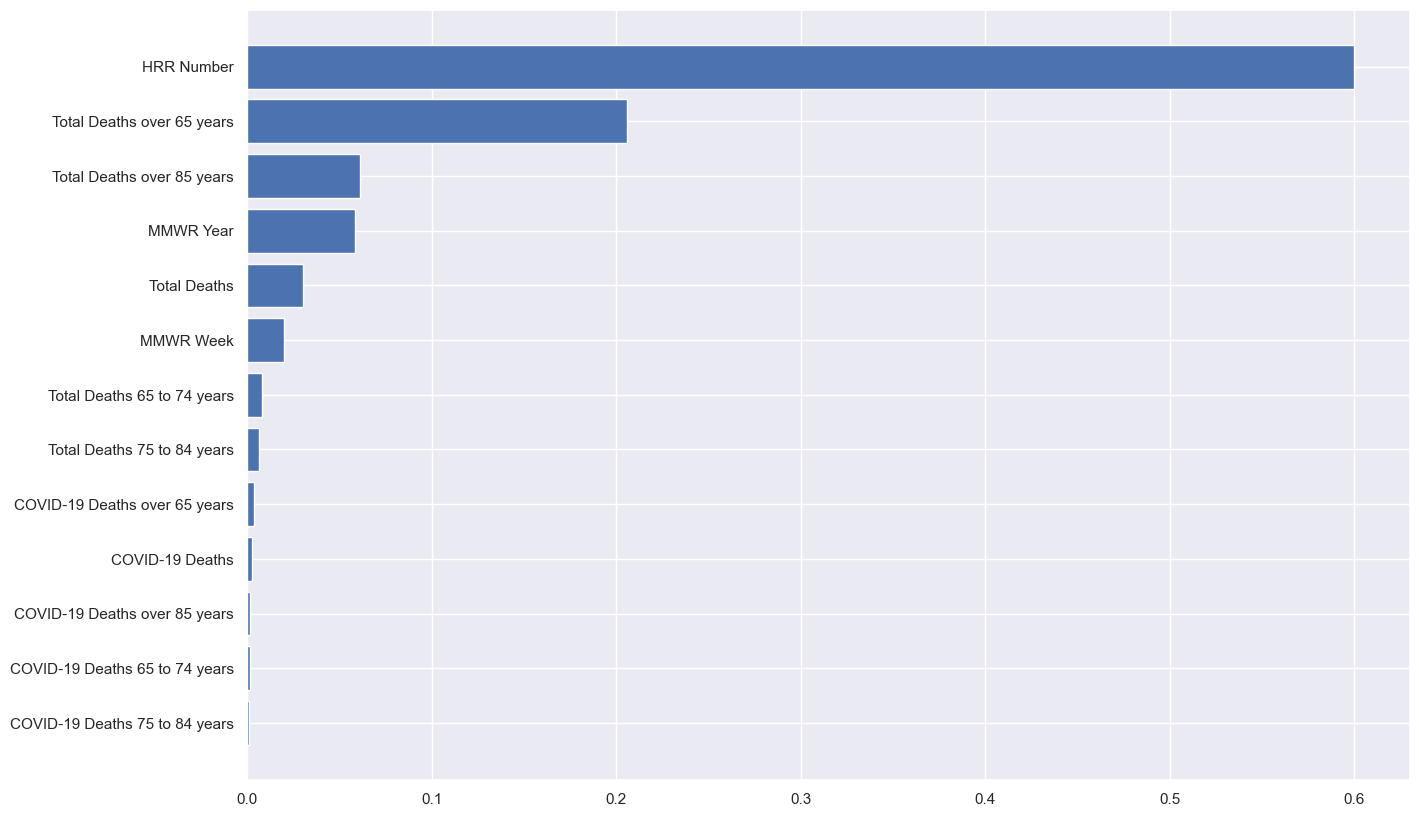

In [180]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()